<a href="https://www.kaggle.com/code/handandegerli/flo-rfm-analysis-project?scriptVersionId=180014808" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# CRM Analitics with RFM
---

**Business Problem: FLO, an online shoe store, wants to segment its customers and determine marketing strategies according to these segments. To this end, the behaviors of the customers will be defined and groups will be formed according to the clusters in these behaviors.**

**Import Libraries**

# 1 ) Understanding Data and Preparation
---

**Task 1: Read csv file and create df**

In [1]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.float_format', lambda x: '%.3f' %x)

In [2]:
df_ = pd.read_csv('/kaggle/input/flodataset/flo_data_20k.csv')

In [3]:
df = df_.copy()

**Task 2: Check these from datasets:**

**First 10 rows \
Variables name  \
Describtive Statistics  \
Null values  \
Variables type**

In [4]:
df.head(10)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.000,1.000,139.990,799.380,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.000,2.000,159.970,1853.580,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.000,2.000,189.970,395.350,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.000,1.000,39.990,81.980,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.000,1.000,49.990,159.990,[AKTIFSPOR]
5,e585280e-aae1-11e9-a2fc-000d3a38a36f,Desktop,Offline,2018-11-18,2021-03-13,2018-11-18,2021-03-13,1.000,2.000,150.870,49.990,[KADIN]
6,c445e4ee-6242-11ea-9d1a-000d3a38a36f,Android App,Android App,2020-03-04,2020-10-18,2020-10-18,2020-03-04,3.000,1.000,59.990,315.940,[AKTIFSPOR]
7,3f1b4dc8-8a7d-11ea-8ec0-000d3a38a36f,Mobile,Offline,2020-05-15,2020-08-12,2020-05-15,2020-08-12,1.000,1.000,49.990,113.640,[COCUK]
8,cfbda69e-5b4f-11ea-aca7-000d3a38a36f,Android App,Android App,2020-01-23,2021-03-07,2021-03-07,2020-01-25,3.000,2.000,120.480,934.210,"[ERKEK, COCUK, KADIN]"
9,1143f032-440d-11ea-8b43-000d3a38a36f,Mobile,Mobile,2019-07-30,2020-10-04,2020-10-04,2019-07-30,1.000,1.000,69.980,95.980,"[KADIN, AKTIFSPOR]"


In [5]:
df.columns

Index(['master_id', 'order_channel', 'last_order_channel', 'first_order_date',
       'last_order_date', 'last_order_date_online', 'last_order_date_offline',
       'order_num_total_ever_online', 'order_num_total_ever_offline',
       'customer_value_total_ever_offline', 'customer_value_total_ever_online',
       'interested_in_categories_12'],
      dtype='object')

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_num_total_ever_online,19945.000,3.111,4.226,1.000,1.000,2.000,4.000,200.000
order_num_total_ever_offline,19945.000,1.914,2.063,1.000,1.000,1.000,2.000,109.000
customer_value_total_ever_offline,19945.000,253.923,301.533,10.000,99.990,179.980,319.970,18119.140
customer_value_total_ever_online,19945.000,497.322,832.602,12.990,149.980,286.460,578.440,45220.130


In [7]:
df.isnull().sum()

master_id                            0
order_channel                        0
last_order_channel                   0
first_order_date                     0
last_order_date                      0
last_order_date_online               0
last_order_date_offline              0
order_num_total_ever_online          0
order_num_total_ever_offline         0
customer_value_total_ever_offline    0
customer_value_total_ever_online     0
interested_in_categories_12          0
dtype: int64

In [8]:
df.dtypes

master_id                             object
order_channel                         object
last_order_channel                    object
first_order_date                      object
last_order_date                       object
last_order_date_online                object
last_order_date_offline               object
order_num_total_ever_online          float64
order_num_total_ever_offline         float64
customer_value_total_ever_offline    float64
customer_value_total_ever_online     float64
interested_in_categories_12           object
dtype: object

**Task 3: Creating new variables for the total number of purchases and expenses of each customer.** \
total_order = ofline_orders + online_orders\
total_value = ofline_value + online_value

In [9]:
df['total_order'] = df['order_num_total_ever_online'] + df['order_num_total_ever_offline']

df['total_value'] = df['customer_value_total_ever_offline'] + df['customer_value_total_ever_online']

In [10]:
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,total_order,total_value
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.000,1.000,139.990,799.380,[KADIN],5.000,939.370
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.000,2.000,159.970,1853.580,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.000,2013.550
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.000,2.000,189.970,395.350,"[ERKEK, KADIN]",5.000,585.320
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.000,1.000,39.990,81.980,"[AKTIFCOCUK, COCUK]",2.000,121.970
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.000,1.000,49.990,159.990,[AKTIFSPOR],2.000,209.980


**Task 4: Examine the variable types. Change the type of variables expressing date to initialdate**

In [11]:
df.dtypes

master_id                             object
order_channel                         object
last_order_channel                    object
first_order_date                      object
last_order_date                       object
last_order_date_online                object
last_order_date_offline               object
order_num_total_ever_online          float64
order_num_total_ever_offline         float64
customer_value_total_ever_offline    float64
customer_value_total_ever_online     float64
interested_in_categories_12           object
total_order                          float64
total_value                          float64
dtype: object

In [12]:
dates = ['first_order_date', 'last_order_date', 'last_order_date_online', 'last_order_date_offline']
df[dates] = df[dates].apply(pd.to_datetime)

In [13]:
df.dtypes

master_id                                    object
order_channel                                object
last_order_channel                           object
first_order_date                     datetime64[ns]
last_order_date                      datetime64[ns]
last_order_date_online               datetime64[ns]
last_order_date_offline              datetime64[ns]
order_num_total_ever_online                 float64
order_num_total_ever_offline                float64
customer_value_total_ever_offline           float64
customer_value_total_ever_online            float64
interested_in_categories_12                  object
total_order                                 float64
total_value                                 float64
dtype: object

**Task 5: Look at the distribution of the number of customers in shopping channels, the number of products collected and their total expenditure.**

In [14]:
df["order_channel"].value_counts()

order_channel
Android App    9495
Mobile         4882
Ios App        2833
Desktop        2735
Name: count, dtype: int64

In [15]:
quantiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

df[['total_order', 'total_value']].describe(quantiles).T

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
total_order,19945.000,5.025,4.743,2.000,2.000,2.000,3.000,3.000,4.000,4.000,5.000,7.000,9.000,202.000
total_value,19945.000,751.244,895.402,44.980,224.970,302.188,378.888,455.826,545.270,660.380,803.706,1020.036,1429.938,45905.100


In [16]:
df[df['total_order'] > 100]

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,total_order,total_value
7223,cba59206-9dd1-11e9-9897-000d3a38a36f,Android App,Android App,2013-02-21,2021-05-09,2021-05-09,2020-01-25,130.000,1.000,49.990,12232.250,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",131.000,12282.240
8783,a57f4302-b1a8-11e9-89fa-000d3a38a36f,Android App,Offline,2019-08-07,2020-11-04,2020-09-07,2020-11-04,2.000,109.000,10239.460,143.980,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",111.000,10383.440
11150,5d1c466a-9cfd-11e9-9897-000d3a38a36f,Android App,Desktop,2013-10-11,2021-04-30,2021-04-30,2020-12-24,200.000,2.000,684.970,45220.130,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",202.000,45905.100


<Axes: ylabel='Frequency'>

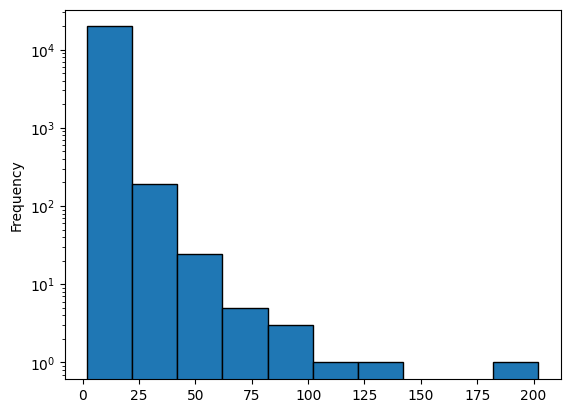

In [17]:
df['total_order'].plot(kind='hist', edgecolor='black', logy=True)

In [18]:
df['total_value'].describe(quantiles).T

count   19945.000
mean      751.244
std       895.402
min        44.980
10%       224.970
20%       302.188
30%       378.888
40%       455.826
50%       545.270
60%       660.380
70%       803.706
80%      1020.036
90%      1429.938
max     45905.100
Name: total_value, dtype: float64

In [19]:
df[df['total_value'] > 10000]

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,total_order,total_value
163,fef57ffa-aae6-11e9-a2fc-000d3a38a36f,Mobile,Desktop,2016-11-08,2021-05-12,2021-05-12,2020-07-09,36.000,1.000,180.730,12545.370,"[ERKEK, AKTIFSPOR]",37.000,12726.100
726,21d218f4-a91a-11e9-a2fc-000d3a38a36f,Ios App,Ios App,2015-10-11,2021-04-14,2021-04-14,2019-06-24,21.000,1.000,49.990,10171.690,"[AKTIFCOCUK, ERKEK]",22.000,10221.680
4315,d5ef8058-a5c6-11e9-a2fc-000d3a38a36f,Android App,Android App,2018-08-06,2021-02-23,2021-02-23,2020-07-06,67.000,1.000,130.490,36687.800,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",68.000,36818.290
7223,cba59206-9dd1-11e9-9897-000d3a38a36f,Android App,Android App,2013-02-21,2021-05-09,2021-05-09,2020-01-25,130.000,1.000,49.990,12232.250,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",131.000,12282.240
7330,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,Desktop,Desktop,2020-02-16,2021-04-30,2021-04-30,2020-12-18,66.000,4.000,843.680,17599.890,"[ERKEK, KADIN, AKTIFSPOR]",70.000,18443.570
7613,73fd19aa-9e37-11e9-9897-000d3a38a36f,Ios App,Offline,2014-01-14,2021-05-18,2021-01-30,2021-05-18,81.000,1.000,1263.760,32654.340,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",82.000,33918.100
8068,d696c654-2633-11ea-8e1c-000d3a38a36f,Ios App,Ios App,2017-05-10,2021-04-13,2021-04-13,2019-08-15,69.000,1.000,82.480,16836.090,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",70.000,16918.570
8783,a57f4302-b1a8-11e9-89fa-000d3a38a36f,Android App,Offline,2019-08-07,2020-11-04,2020-09-07,2020-11-04,2.000,109.000,10239.460,143.980,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",111.000,10383.440
9055,47a642fe-975b-11eb-8c2a-000d3a38a36f,Android App,Offline,2021-04-07,2021-04-27,2021-04-07,2021-04-27,1.000,3.000,18119.140,2587.200,[AKTIFSPOR],4.000,20706.340
11150,5d1c466a-9cfd-11e9-9897-000d3a38a36f,Android App,Desktop,2013-10-11,2021-04-30,2021-04-30,2020-12-24,200.000,2.000,684.970,45220.130,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",202.000,45905.100


**Task 6: List the top 10 customers that bring the most profit.**

In [20]:
df.sort_values('total_value', ascending=False).head(10)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,total_order,total_value
11150,5d1c466a-9cfd-11e9-9897-000d3a38a36f,Android App,Desktop,2013-10-11,2021-04-30,2021-04-30,2020-12-24,200.000,2.000,684.970,45220.130,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",202.000,45905.100
4315,d5ef8058-a5c6-11e9-a2fc-000d3a38a36f,Android App,Android App,2018-08-06,2021-02-23,2021-02-23,2020-07-06,67.000,1.000,130.490,36687.800,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",68.000,36818.290
7613,73fd19aa-9e37-11e9-9897-000d3a38a36f,Ios App,Offline,2014-01-14,2021-05-18,2021-01-30,2021-05-18,81.000,1.000,1263.760,32654.340,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",82.000,33918.100
13880,7137a5c0-7aad-11ea-8f20-000d3a38a36f,Ios App,Offline,2021-03-01,2021-04-13,2021-03-18,2021-04-13,10.000,1.000,538.940,30688.470,"[ERKEK, KADIN, AKTIFSPOR]",11.000,31227.410
9055,47a642fe-975b-11eb-8c2a-000d3a38a36f,Android App,Offline,2021-04-07,2021-04-27,2021-04-07,2021-04-27,1.000,3.000,18119.140,2587.200,[AKTIFSPOR],4.000,20706.340
7330,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,Desktop,Desktop,2020-02-16,2021-04-30,2021-04-30,2020-12-18,66.000,4.000,843.680,17599.890,"[ERKEK, KADIN, AKTIFSPOR]",70.000,18443.570
8068,d696c654-2633-11ea-8e1c-000d3a38a36f,Ios App,Ios App,2017-05-10,2021-04-13,2021-04-13,2019-08-15,69.000,1.000,82.480,16836.090,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",70.000,16918.570
163,fef57ffa-aae6-11e9-a2fc-000d3a38a36f,Mobile,Desktop,2016-11-08,2021-05-12,2021-05-12,2020-07-09,36.000,1.000,180.730,12545.370,"[ERKEK, AKTIFSPOR]",37.000,12726.100
7223,cba59206-9dd1-11e9-9897-000d3a38a36f,Android App,Android App,2013-02-21,2021-05-09,2021-05-09,2020-01-25,130.000,1.000,49.990,12232.250,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",131.000,12282.240
18767,fc0ce7a4-9d87-11e9-9897-000d3a38a36f,Desktop,Desktop,2018-11-24,2020-11-11,2020-11-11,2019-12-06,18.000,2.000,64.970,12038.180,"[ERKEK, KADIN]",20.000,12103.150


**Task 7:List the top 10 customers who place the most orders**

In [21]:
df.sort_values('total_order', ascending=False).head(10)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,total_order,total_value
11150,5d1c466a-9cfd-11e9-9897-000d3a38a36f,Android App,Desktop,2013-10-11,2021-04-30,2021-04-30,2020-12-24,200.000,2.000,684.970,45220.130,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",202.000,45905.100
7223,cba59206-9dd1-11e9-9897-000d3a38a36f,Android App,Android App,2013-02-21,2021-05-09,2021-05-09,2020-01-25,130.000,1.000,49.990,12232.250,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",131.000,12282.240
8783,a57f4302-b1a8-11e9-89fa-000d3a38a36f,Android App,Offline,2019-08-07,2020-11-04,2020-09-07,2020-11-04,2.000,109.000,10239.460,143.980,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",111.000,10383.440
2619,fdbe8304-a7ab-11e9-a2fc-000d3a38a36f,Android App,Offline,2018-10-18,2020-06-30,2018-10-18,2020-06-30,1.000,87.000,8432.250,139.980,[ERKEK],88.000,8572.230
6322,329968c6-a0e2-11e9-a2fc-000d3a38a36f,Ios App,Ios App,2019-02-14,2021-04-05,2021-04-05,2020-02-17,2.000,81.000,3997.550,242.810,[ERKEK],83.000,4240.360
7613,73fd19aa-9e37-11e9-9897-000d3a38a36f,Ios App,Offline,2014-01-14,2021-05-18,2021-01-30,2021-05-18,81.000,1.000,1263.760,32654.340,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",82.000,33918.100
9347,44d032ee-a0d4-11e9-a2fc-000d3a38a36f,Mobile,Mobile,2019-02-11,2021-02-11,2021-02-11,2020-12-24,3.000,74.000,4640.770,543.280,"[KADIN, AKTIFSPOR]",77.000,5184.050
10954,b27e241a-a901-11e9-a2fc-000d3a38a36f,Mobile,Mobile,2015-09-12,2021-04-01,2021-04-01,2019-10-08,72.000,3.000,292.930,5004.950,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",75.000,5297.880
8068,d696c654-2633-11ea-8e1c-000d3a38a36f,Ios App,Ios App,2017-05-10,2021-04-13,2021-04-13,2019-08-15,69.000,1.000,82.480,16836.090,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",70.000,16918.570
7330,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,Desktop,Desktop,2020-02-16,2021-04-30,2021-04-30,2020-12-18,66.000,4.000,843.680,17599.890,"[ERKEK, KADIN, AKTIFSPOR]",70.000,18443.570


**Task 8: Functionalization all the steps of undestanding data.**


In [22]:
def data_preparation(dataframe, head=5):
    print('######################## Head ########################')
    print(dataframe.head(head), '\n')
    print('######################## Columns ########################')
    print(dataframe.columns, '\n')
    print('######################## Descriptive Statistics for Numerical Variables ########################')
    print(dataframe.describe().T, '\n')
    print('######################## NA ########################')
    print(dataframe.isnull().sum(), '\n')
    print('######################## Variables Type ########################')
    print(dataframe.dtypes, '\n')
      
    # Creating total_order and total_value
    dataframe['total_order'] = dataframe['order_num_total_ever_online'] + dataframe['order_num_total_ever_offline']
    dataframe['total_value'] = dataframe['customer_value_total_ever_offline'] + dataframe['customer_value_total_ever_online']
    
    # Covert dates to datetime object
    dates = ['first_order_date', 'last_order_date', 'last_order_date_online', 'last_order_date_offline']
    dataframe[dates] = dataframe[dates].apply(pd.to_datetime)
    
    print('######################## Order Channel Frequency ########################')
    print(dataframe['order_channel'].value_counts(), '\n')
    
    print('######################## Total Order and Total Value Frequency ########################')
    quantiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    print(dataframe[['total_order', 'total_value']].describe(quantiles).T, '\n')
    
    print('######################## Top 10 Customers With The Most Profit ########################')
    print(dataframe.sort_values('total_value', ascending=False)['total_value'].head(10), '\n')
    print('######################## Top 10 Customers With The Most Order ########################')
    print(dataframe.sort_values('total_order', ascending=False)['total_order'].head(10), '\n')

In [23]:
data_preparation(df)

######################## Head ########################
                              master_id order_channel last_order_channel  \
0  cc294636-19f0-11eb-8d74-000d3a38a36f   Android App            Offline   
1  f431bd5a-ab7b-11e9-a2fc-000d3a38a36f   Android App             Mobile   
2  69b69676-1a40-11ea-941b-000d3a38a36f   Android App        Android App   
3  1854e56c-491f-11eb-806e-000d3a38a36f   Android App        Android App   
4  d6ea1074-f1f5-11e9-9346-000d3a38a36f       Desktop            Desktop   

  first_order_date last_order_date last_order_date_online  \
0       2020-10-30      2021-02-26             2021-02-21   
1       2017-02-08      2021-02-16             2021-02-16   
2       2019-11-27      2020-11-27             2020-11-27   
3       2021-01-06      2021-01-17             2021-01-17   
4       2019-08-03      2021-03-07             2021-03-07   

  last_order_date_offline  order_num_total_ever_online  \
0              2021-02-26                        4.000   
1    

# 2 ) Calculating RMF Metrics
---

**Task 1: Define Recency, Frequency and Monetary.**

RFM Metrics

Recency: how long ago they made a purchase.

Frequency: how often they make purchases.

Monetary: how much money they spend.

**Task 2: Calculate the Recency, Frequency and Monetary metrics for the customer.**

In [24]:
df.head(3)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,total_order,total_value
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.000,1.000,139.990,799.380,[KADIN],5.000,939.370
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.000,2.000,159.970,1853.580,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.000,2013.550
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.000,2.000,189.970,395.350,"[ERKEK, KADIN]",5.000,585.320


In [25]:
today_date = df['last_order_date'].max() + dt.timedelta(days=2)
today_date = dt.datetime(today_date.year, today_date.month, today_date.day)

In [26]:
today_date

datetime.datetime(2021, 6, 1, 0, 0)

In [27]:
df.head(3)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,total_order,total_value
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.000,1.000,139.990,799.380,[KADIN],5.000,939.370
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.000,2.000,159.970,1853.580,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.000,2013.550
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.000,2.000,189.970,395.350,"[ERKEK, KADIN]",5.000,585.320


**Task 3: Assign the metrics you calculated to a variable named rfm.** 

In [28]:
rfm = pd.DataFrame()

**Task 4: Change the names of the metrics you created to recency, frequency and monetary.**

In [29]:
rfm['recency'] = df['last_order_date'].agg(lambda x: (today_date - x).days)
rfm['frequency'] = df['total_order']
rfm['monetary'] = df['total_value']

/tmp/ipykernel_19/1306142572.py:1: FutureWarning: using <function <lambda> at 0x791534eb7490> in Series.agg cannot aggregate and has been deprecated. Use Series.transform to keep behavior unchanged.
  rfm['recency'] = df['last_order_date'].agg(lambda x: (today_date - x).days)


In [30]:
rfm.head()

,recency,frequency,monetary
0,95,5.000,939.370
1,105,21.000,2013.550
2,186,5.000,585.320
3,135,2.000,121.970
4,86,2.000,209.980


In [31]:
rfm.set_index(df['master_id'], inplace=True)

In [32]:
rfm.head()

,recency,frequency,monetary
master_id,,,
cc294636-19f0-11eb-8d74-000d3a38a36f,95,5.000,939.370
f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105,21.000,2013.550
69b69676-1a40-11ea-941b-000d3a38a36f,186,5.000,585.320
1854e56c-491f-11eb-806e-000d3a38a36f,135,2.000,121.970
d6ea1074-f1f5-11e9-9346-000d3a38a36f,86,2.000,209.980


# 3 ) Calculating RMF Scores
---

**Task 1: Convert Recency, Frequency and Monetary metrics into scores between 1-5 with the help of qcut.**

**Task 2: Save these scores as recency_score, frequency_score, and monetary_score.**

In [33]:
rfm['recency_score'] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['frequency_score'] = pd.qcut(rfm['frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm['monetary_score'] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])

In [34]:
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score
master_id,,,,,,
cc294636-19f0-11eb-8d74-000d3a38a36f,95,5.000,939.370,3,4,4
f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105,21.000,2013.550,3,5,5
69b69676-1a40-11ea-941b-000d3a38a36f,186,5.000,585.320,2,4,3
1854e56c-491f-11eb-806e-000d3a38a36f,135,2.000,121.970,3,1,1
d6ea1074-f1f5-11e9-9346-000d3a38a36f,86,2.000,209.980,3,1,1


**Task 3: Express recency_score and frequency_score as a single variable and save as RF_SCORE.**

In [35]:
rfm['rf_score'] = rfm['recency_score'].astype(str) + rfm['frequency_score'].astype(str)

In [36]:
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rf_score
master_id,,,,,,,
cc294636-19f0-11eb-8d74-000d3a38a36f,95,5.000,939.370,3,4,4,34
f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105,21.000,2013.550,3,5,5,35
69b69676-1a40-11ea-941b-000d3a38a36f,186,5.000,585.320,2,4,3,24
1854e56c-491f-11eb-806e-000d3a38a36f,135,2.000,121.970,3,1,1,31
d6ea1074-f1f5-11e9-9346-000d3a38a36f,86,2.000,209.980,3,1,1,31


# 4 ) Segment customer with RF scores
---

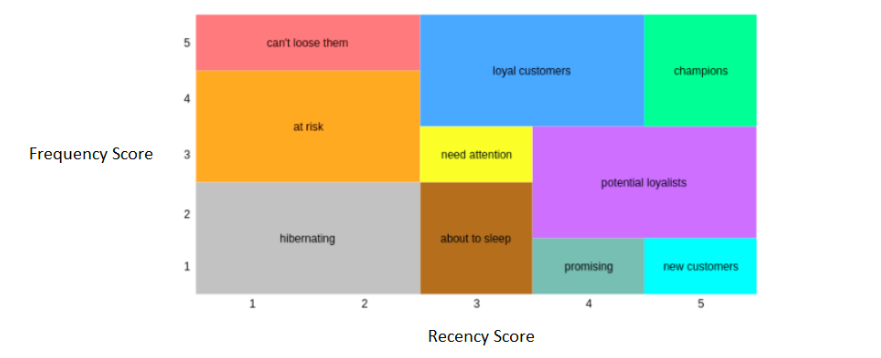

In [37]:
segments_map = {r'[1-2][1-2]': 'hibernating',
          r'[1-2][3-4]': 'at risk',
          r'[1-2]5': 'cant lose them',
          r'3[1-2]': 'about to sleep',
          r'33': 'need attention',
          r'[3-4][4-5]': 'loyal customers',
          r'41': 'promising',
          r'[4-5][2-3]': 'potential loyallists',
          r'51': 'new_customers',
          r'5[4-5]': 'champions'}

In [38]:
rfm['segments'] = rfm['rf_score'].replace(segments_map, regex=True)

In [39]:
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rf_score,segments
master_id,,,,,,,,
cc294636-19f0-11eb-8d74-000d3a38a36f,95,5.000,939.370,3,4,4,34,loyal customers
f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105,21.000,2013.550,3,5,5,35,loyal customers
69b69676-1a40-11ea-941b-000d3a38a36f,186,5.000,585.320,2,4,3,24,at risk
1854e56c-491f-11eb-806e-000d3a38a36f,135,2.000,121.970,3,1,1,31,about to sleep
d6ea1074-f1f5-11e9-9346-000d3a38a36f,86,2.000,209.980,3,1,1,31,about to sleep


5 ) Check the recency, frequency and monetary mean of segments
---

In [40]:
rfm[["segments", "recency", "frequency", "monetary"]].groupby("segments").agg(["mean"])


,recency,frequency,monetary
,mean,mean,mean
segments,,,
about to sleep,113.785,2.401,359.009
at risk,241.607,4.472,646.610
cant lose them,235.444,10.698,1474.468
champions,17.107,8.934,1406.625
hibernating,247.950,2.394,366.267
loyal customers,82.595,8.375,1216.819
need attention,113.829,3.728,562.143
new_customers,17.918,2.000,339.956


**Task 1: Loyal customers (champions, loyal_customers) and people who shop from the female category will be contacted privately. Save the id numbers of these customers in the csv file.**

In [41]:
women = df[df['interested_in_categories_12'].str.contains('KADIN', na=False)]
women

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,total_order,total_value
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.000,1.000,139.990,799.380,[KADIN],5.000,939.370
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.000,2.000,159.970,1853.580,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.000,2013.550
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.000,2.000,189.970,395.350,"[ERKEK, KADIN]",5.000,585.320
5,e585280e-aae1-11e9-a2fc-000d3a38a36f,Desktop,Offline,2018-11-18,2021-03-13,2018-11-18,2021-03-13,1.000,2.000,150.870,49.990,[KADIN],3.000,200.860
8,cfbda69e-5b4f-11ea-aca7-000d3a38a36f,Android App,Android App,2020-01-23,2021-03-07,2021-03-07,2020-01-25,3.000,2.000,120.480,934.210,"[ERKEK, COCUK, KADIN]",5.000,1054.690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19926,7e1c15be-6298-11ea-9861-000d3a38a36f,Android App,Android App,2019-02-16,2021-05-22,2021-05-22,2020-03-06,6.000,2.000,310.700,1062.390,"[KADIN, AKTIFSPOR]",8.000,1373.090
19932,13a5e98c-a824-11e9-a2fc-000d3a38a36f,Android App,Offline,2015-03-23,2020-11-05,2020-06-28,2020-11-05,7.000,2.000,210.720,963.280,"[ERKEK, KADIN, AKTIFSPOR]",9.000,1174.000
19934,9777eb76-bed4-11ea-958c-000d3a38a36f,Desktop,Offline,2020-07-05,2020-12-02,2020-11-28,2020-12-02,1.000,2.000,390.960,143.990,"[ERKEK, KADIN]",3.000,534.950
19937,515ca2d8-afdc-11e9-9757-000d3a38a36f,Ios App,Ios App,2019-03-10,2020-08-27,2020-08-27,2019-09-04,5.000,1.000,39.990,604.880,"[COCUK, KADIN]",6.000,644.870


In [42]:
champions_and_loyals = rfm[(rfm['segments'] == 'champions') | (rfm['segments'] == 'loyal customers')].reset_index()
champions_and_loyals

,master_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rf_score,segments
0,cc294636-19f0-11eb-8d74-000d3a38a36f,95,5.000,939.370,3,4,4,34,loyal customers
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,105,21.000,2013.550,3,5,5,35,loyal customers
2,cfbda69e-5b4f-11ea-aca7-000d3a38a36f,86,5.000,1054.690,3,4,5,34,loyal customers
3,c2e15af2-9eed-11e9-9897-000d3a38a36f,13,20.000,2861.600,5,5,5,55,champions
4,241f0ad0-afb5-11e9-9757-000d3a38a36f,2,24.000,4413.290,5,5,5,55,champions
...,...,...,...,...,...,...,...,...,...
5288,1b18778e-aa04-11e9-a2fc-000d3a38a36f,39,9.000,1745.480,4,5,5,45,loyal customers
5289,ba5cd8c2-b142-11e9-9757-000d3a38a36f,80,11.000,1498.450,4,5,5,45,loyal customers
5290,7e1c15be-6298-11ea-9861-000d3a38a36f,10,8.000,1373.090,5,5,5,55,champions
5291,c81bac06-b1f4-11e9-89fa-000d3a38a36f,55,9.000,1181.720,4,5,5,45,loyal customers


In [43]:
champions_loyal_women = pd.merge(champions_and_loyals, women, on='master_id', how='inner')['master_id']
champions_loyal_women.shape

(2497,)

In [44]:
champions_loyal_women.to_csv('champions_loyal_women.csv')

**Task 2: 40% discount is planned for Men's and Children's products. 'About to sleep' and 'new customers' are intended to be specifically targeted. Save the id's of these customers in csv file.**

In [45]:
men_and_child = df[df['interested_in_categories_12'].str.contains('ERKEK', na=False) | df['interested_in_categories_12'].str.contains('COCUK', na=False)]
men_and_child

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,total_order,total_value
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.000,2.000,159.970,1853.580,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.000,2013.550
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.000,2.000,189.970,395.350,"[ERKEK, KADIN]",5.000,585.320
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.000,1.000,39.990,81.980,"[AKTIFCOCUK, COCUK]",2.000,121.970
7,3f1b4dc8-8a7d-11ea-8ec0-000d3a38a36f,Mobile,Offline,2020-05-15,2020-08-12,2020-05-15,2020-08-12,1.000,1.000,49.990,113.640,[COCUK],2.000,163.630
8,cfbda69e-5b4f-11ea-aca7-000d3a38a36f,Android App,Android App,2020-01-23,2021-03-07,2021-03-07,2020-01-25,3.000,2.000,120.480,934.210,"[ERKEK, COCUK, KADIN]",5.000,1054.690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19936,1982ac0e-9f4c-11e9-9897-000d3a38a36f,Android App,Android App,2019-02-08,2020-06-28,2020-06-28,2019-09-28,10.000,2.000,149.980,1468.240,[AKTIFCOCUK],12.000,1618.220
19937,515ca2d8-afdc-11e9-9757-000d3a38a36f,Ios App,Ios App,2019-03-10,2020-08-27,2020-08-27,2019-09-04,5.000,1.000,39.990,604.880,"[COCUK, KADIN]",6.000,644.870
19938,2427ef66-a410-11e9-a2fc-000d3a38a36f,Android App,Android App,2019-04-12,2020-12-14,2020-12-14,2020-06-21,1.000,3.000,580.710,279.990,"[ERKEK, AKTIFSPOR]",4.000,860.700
19940,727e2b6e-ddd4-11e9-a848-000d3a38a36f,Android App,Offline,2019-09-21,2020-07-05,2020-06-05,2020-07-05,1.000,2.000,289.980,111.980,"[ERKEK, AKTIFSPOR]",3.000,401.960


In [46]:
new_customer_and_about_to_sleep = rfm[(rfm['segments'] == 'about to sleep') | (rfm['segments'] == 'new_customers') | (rfm['segments'] == 'cant lose them')].reset_index()
new_customer_and_about_to_sleep

,master_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rf_score,segments
0,1854e56c-491f-11eb-806e-000d3a38a36f,135,2.000,121.970,3,1,1,31,about to sleep
1,d6ea1074-f1f5-11e9-9346-000d3a38a36f,86,2.000,209.980,3,1,1,31,about to sleep
2,13ed97a4-b167-11e9-89fa-000d3a38a36f,288,8.000,932.360,1,5,4,15,cant lose them
3,4da5c2ba-403b-11ea-aa6b-000d3a38a36f,128,2.000,109.970,3,1,1,31,about to sleep
4,4fbb0cbe-9085-11ea-af25-000d3a38a36f,123,2.000,242.450,3,1,1,31,about to sleep
...,...,...,...,...,...,...,...,...,...
3504,36c10134-9ea3-11e9-9897-000d3a38a36f,337,9.000,971.850,1,5,4,15,cant lose them
3505,13a5e98c-a824-11e9-a2fc-000d3a38a36f,208,9.000,1174.000,2,5,5,25,cant lose them
3506,6d285c64-5e73-11ea-be5b-000d3a38a36f,220,8.000,1114.800,2,5,5,25,cant lose them
3507,b514d468-5b52-11ea-85ca-000d3a38a36f,105,2.000,259.990,3,2,1,32,about to sleep


In [47]:
merge_ids = pd.merge(men_and_child, new_customer_and_about_to_sleep, on='master_id', how='inner')['master_id']
merge_ids.shape

(1759,)

In [48]:
merge_ids.to_csv('about_to_sleep_and_new_customer.csv')